Name: Natasha Kayla Cahyadi

NIM: 2702235891

Class: LB09 - Machine Learning

# Libraries

In [253]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import os
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from difflib import get_close_matches

# Data Preprocessing

In [254]:
# Read the Data
df = pd.read_csv('3A.tsv', delimiter='\t')

In [255]:
# Display the Data
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,-706.0,NaN,NaN
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,-92.0,NaN,NaN


In [256]:
# Display the data
df.tail()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16923,16923,Aliens: Colonial Marines,PS3,2013,Shooter,Sega,0.20,0.29,0.00,0.11,0.6,43.0,25.0,3.6,295.0,Gearbox Software,M
16924,16924,Backyard Wrestling: Don't Try This at Home,PS2,2003,Fighting,Eidos Interactive,0.30,0.23,0.00,0.08,0.6,51.0,24.0,7.8,29.0,Paradox Development,M
16925,16925,Yakuza: Dead Souls,PS3,2011,Shooter,Sega,0.09,0.06,0.42,0.03,0.6,64.0,55.0,7.4,69.0,Ryu ga Gotoku Studios,M
16926,16926,Fight Night Round 2,XB,2005,Fighting,Electronic Arts,0.42,0.16,0.00,0.02,0.6,88.0,48.0,8.8,27.0,EA Sports,T
16927,16927,MonHun Nikki: Poka Poka Ailu Mura,PSP,2010,Role-Playing,Capcom,0.00,0.00,0.60,0.00,0.6,NaN,NaN,NaN,-170.0,NaN,NaN


In [257]:
df.shape

(16928, 17)

In [258]:
# Show data columns
df.columns

Index(['index', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating'],
      dtype='object')

In [ ]:
# Show info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16928 non-null  int64  
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       16928 non-null  float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(8

**Variable in this dataset** :
- index, data type : int
- Name, data type : object
- Platform, data type : object
- Year_of_Release, data type : int
- Genre, data type : object
- Publisher, data type : object
- NA_Sales, data type : float
- EU_Sales, data type : float
- JP_Sales, data type : float
- Other_Sales, data type : float
- Global_Sales, data type : float
- Critic_Score, data type : float
- Critic_Count, data type : float
- User_Score, data type : object
- User_Count, data type : float
- Developer, data type : object
- Rating, data type : object

**Range Index** : 16928 entries

**Number of Columns** : 17

**Memory Usage** : 2.2+ MB

In [260]:
# Show statistics descriptive
df.describe()

,index,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,8260.000000,8260.000000,16928.000000
mean,8463.500000,1974.215147,0.266390,0.146850,0.078170,0.047861,0.539520,69.037893,26.428692,-195.792120
std,4886.837014,252.128480,0.814326,0.504585,0.308756,0.186675,1.550545,13.943198,18.989929,545.393536
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,-1000.000000
25%,4231.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,-538.000000
50%,8463.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,-82.000000
75%,12695.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.490000,79.000000,36.000000,21.000000
max,16927.000000,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [261]:
# Show unique number
df.nunique()

index              16928
Name               11562
Platform              31
Year_of_Release       49
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            96
User_Count          1888
Developer           1696
Rating                 8
dtype: int64

**index** and **name** have **the most** unique number because those columns is an **identifier**. So, it should have different number in each row.

## Drop Identifier

In [262]:
# Drop index column
df.drop(columns=['index'], inplace=True)

Drop **index** column because they contain unique values and we don't need index when building recommender system.

## Handle Duplicated Data

In [263]:
# Show duplicated data
df.duplicated().sum()

125

There is 125 duplicated values in this dataset.

In [264]:
# Drop duplicated data
df.drop_duplicates(inplace=True)

## Handle Missing Values

In [265]:
# Change 'tbd' to NaN
df['User_Score'].replace('tbd', np.nan, inplace=True)

# Convert to numeric
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

There are 'TBD' (to be distributed) values in the **User_Score** column. These values should be replaced with NaN so that the NULL values can be dropped, allowing the data type to be converted to numeric.

In [266]:
# Show missing values for each variables
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
data_types = df.dtypes
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage, 'Data Type': data_types})
missing_data = missing_data.sort_values(by=['Missing Percentage'], ascending=False)
missing_data.style

,Missing Values,Missing Percentage,Data Type
User_Score,9210,54.811641,float64
Critic_Score,8657,51.520562,float64
Critic_Count,8657,51.520562,float64
Rating,6835,40.677260,object
Developer,6688,39.802416,object
Publisher,55,0.327323,object
Name,2,0.011903,object
Genre,2,0.011903,object
Platform,0,0.000000,object
Year_of_Release,0,0.000000,int64


- The **User_Score** column has **9210 missing values**, accounting for approximately **54.81%** of the dataset.
- The **Critic_Score** column has **8657 missing values**, accounting for approximately **51.52%** of the dataset.
- The **Critic_Count** column has **8657 missing values**, accounting for approximately **51.52%** of the dataset.
- The **Rating** column has **6835 missing values**, accounting for approximately **40.67%** of the dataset.
- The **Developer** column has **6688 missing values**, accounting for approximately **39.80%** of the dataset.
- The **Publisher** column has **55 missing values**, accounting for approximately **0.32%** of the dataset.
- The **Name** column has **2 missing values**, accounting for approximately **0.01%** of the dataset.
- The **Genre** column has **2 missing values**, accounting for approximately **0.01%** of the dataset.

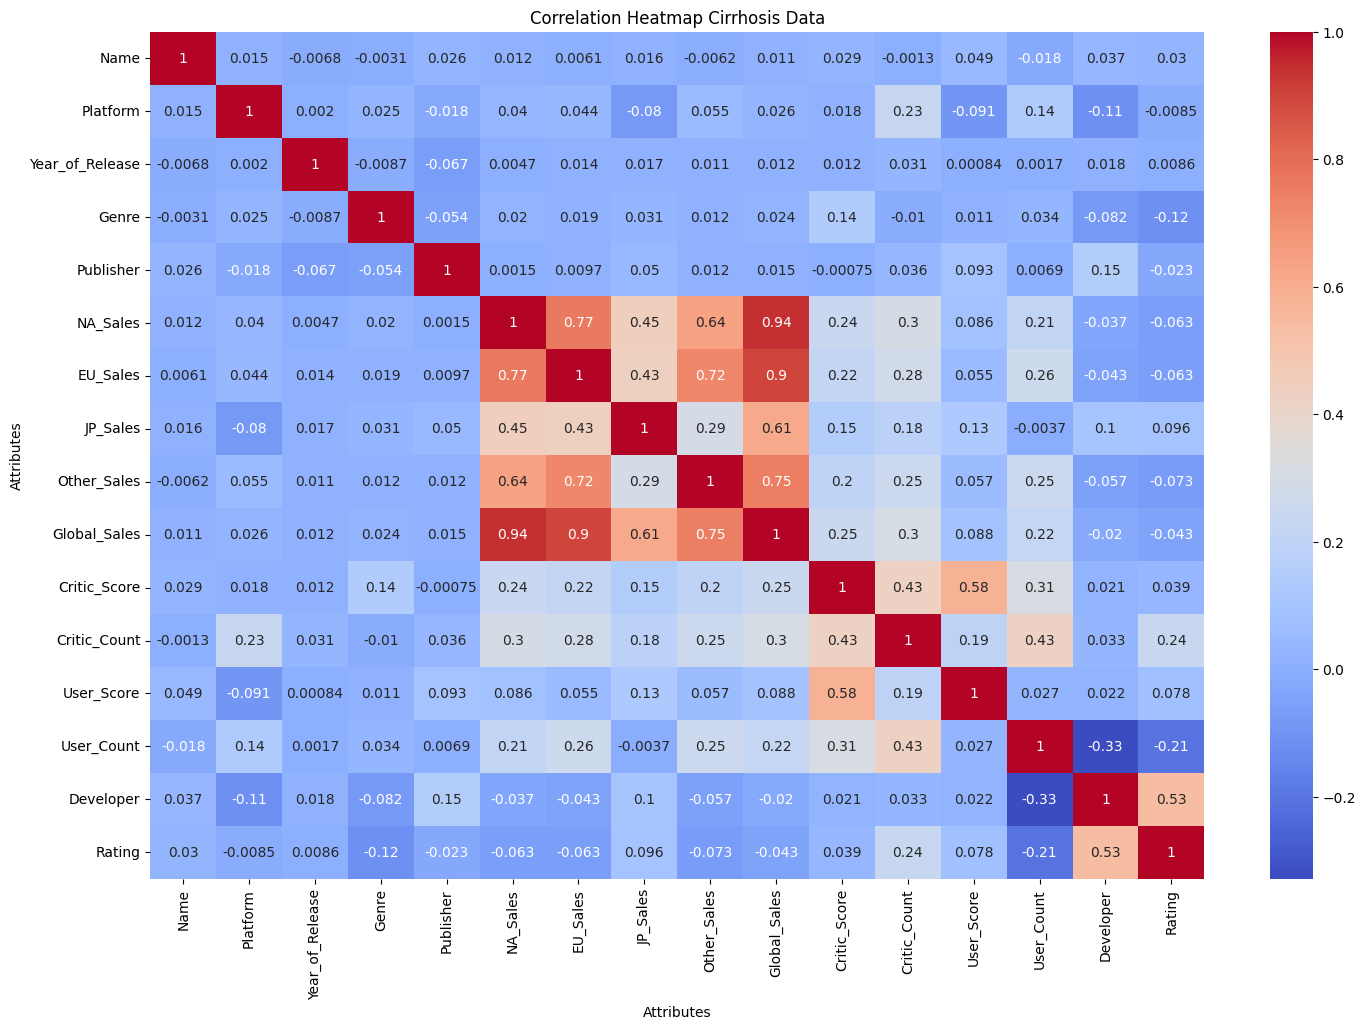

In [267]:
# Heatmap
data = df.copy()

bin_enc = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = bin_enc.fit_transform(data[col].astype(str))

correlation_matrix_all = data.corr()

plt.figure(figsize=(17, 11))
sns.heatmap(correlation_matrix_all, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap Cirrhosis Data")
plt.xlabel("Attributes")
plt.ylabel("Attributes")
plt.show()

In [268]:
# Drop critic score, critic count, and user columns
df.drop(columns=['Critic_Score', 'Critic_Count', 'User_Score'], inplace=True)

Drop the **Critic_Score, Critic_Count, and User_Score** columns because they contain a large number of missing values, and the **Critic_Score and Critic_Count** columns are not significant for the analysis.

In [269]:
# Fill NA with 'Unknown'
df['Developer'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Unknown', inplace=True)

Fill the NaN values in the **Developer and Rating** columns with 'Unknown' because using the mode could impact the model's performance.

In [270]:
# Drop NA
df.dropna(inplace=True)

Drop the NaN values in the **Publisher, Name, and Genre** columns, as these columns have less than 10% missing values.

# Exploratory Data Analysis (EDA)

In [271]:
# Make an empty variable to store categorical and numerical columns
categorical_columns = []
numerical_columns = []

# Looping to divide categorical and numerical, then store it to an empty variable that we've made
for i in df.columns:
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        numerical_columns.append(i)
    else:
        categorical_columns.append(i)

# Display the categorical and numerical columns
print(f'Categorical: {categorical_columns}')
print(f'Numeric: {numerical_columns}')

Categorical: ['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating']
Numeric: ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'User_Count']


We divide the variables into **categorical** and **numerical** to simplify our data preprocessing.

In [272]:
# Count the categorical values in each columns
for i in categorical_columns:
    print(df[i].value_counts(),'\n')

Name
Need for Speed: Most Wanted                           12
LEGO Marvel Super Heroes                               9
Madden NFL 07                                          9
Ratatouille                                            9
FIFA 14                                                9
                                                      ..
Mega Man Battle Network 5: Team Colonel / Protoman     1
Saka-Tsuku DS: Touch and Direct                        1
Tales of VS.                                           1
Critical Depth                                         1
Haitaka no Psychedelica                                1
Name: count, Length: 11514, dtype: int64 

Platform
PS2     2167
DS      2155
PS3     1332
Wii     1325
X360    1260
PSP     1209
PS      1207
PC       969
XB       825
GBA      803
GC       560
3DS      524
PSV      433
PS4      396
N64      325
XOne     249
SNES     242
SAT      175
WiiU     147
2600     136
GB        99
NES       98
DC        52
GEN       27
NG  

## Handle the Anomalies

The **User_Score** column initially contained 'TBD' values, which were replaced with NaN. The data type was then converted to numeric before removing the missing values.

In [273]:
# Filter rows where "User_Count" is less than 0
negative_values = df[df["User_Count"] < 0]
print(negative_values["User_Count"].count())

9159


Filter out rows where **User_Count is less than 0**, as User_Count cannot have negative values.

In [274]:
# Filter rows where "Year_of_Release" < 1950
negative_values = df[df["Year_of_Release"] < 1950]
print(negative_values["Year_of_Release"].count())

251


The first game, Bertie the Brain, was created in **1950**. However, there are 251 games listed as being **released before 1950**. These 251 entries can be considered anomalies.

In [275]:
# Compute the median of only the positive values in 'User_Count'
positive_median = df[df["User_Count"] > 0]["User_Count"].median()

# Replace negative values with the positive median
df["User_Count"] = df["User_Count"].apply(lambda x: positive_median if x < 0 else x)

# Verify that no negative values remain
print(df["User_Count"].describe())

count    16746.000000
mean        86.612922
std        384.064770
min          4.000000
25%         24.000000
50%         24.000000
75%         24.000000
max      10665.000000
Name: User_Count, dtype: float64


Replace the missing values with the **median** because the distribution is not normal. Replacing with 0 could make items with corrected counts of 0 appear less relevant compared to those with valid positive counts.

In [276]:
# Filter out rows where 'Year_of_Release' is less than 1950
df = df[df["Year_of_Release"] >= 1950] 

Filter out rows where 'Year_of_Release' is less than 1950 because those column only have 251 variable, which means below 10%

## Heatmap

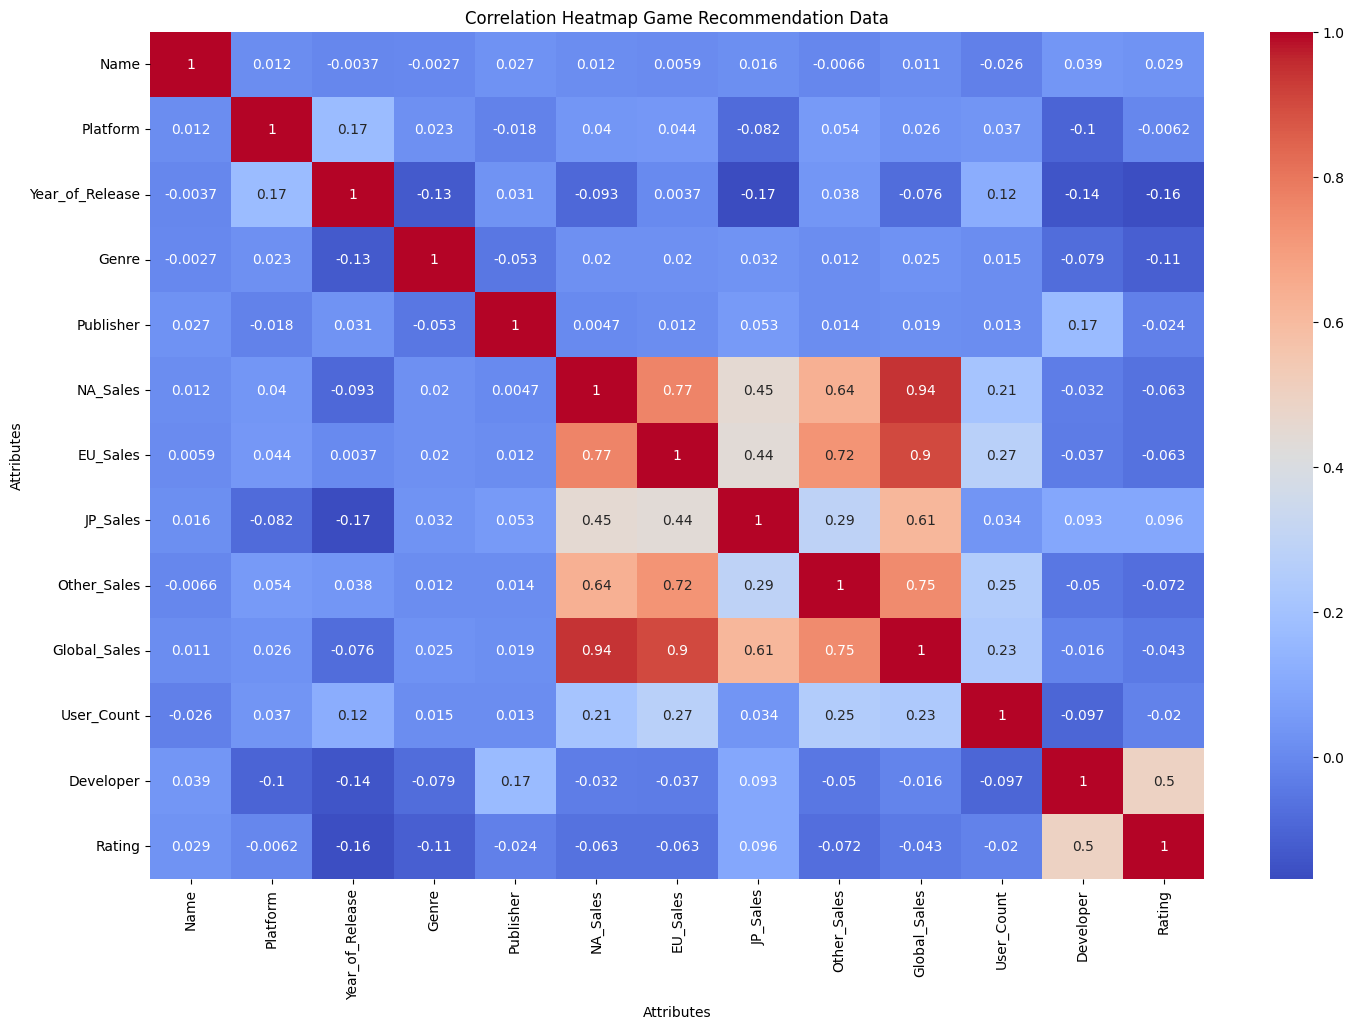

In [277]:
# Heatmap after handled missing values and anomalies
data = df.copy()

bin_enc = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = bin_enc.fit_transform(data[col].astype(str))

correlation_matrix_all = data.corr()

plt.figure(figsize=(17, 11))
sns.heatmap(correlation_matrix_all, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap Game Recommendation Data")
plt.xlabel("Attributes")
plt.ylabel("Attributes")
plt.show()

## Check Distribution

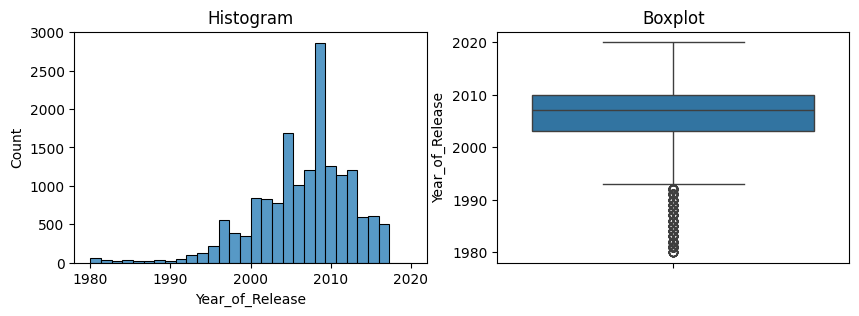

Skewness: -0.9754000647557888
Kurtosis: 1.7689352754520904


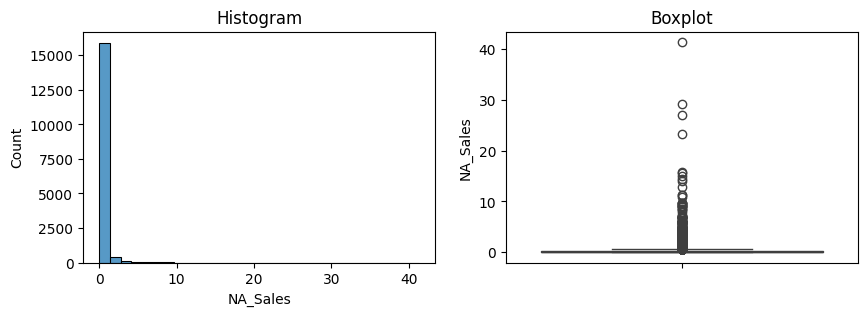

Skewness: 18.688687072907527
Kurtosis: 641.9446500968979


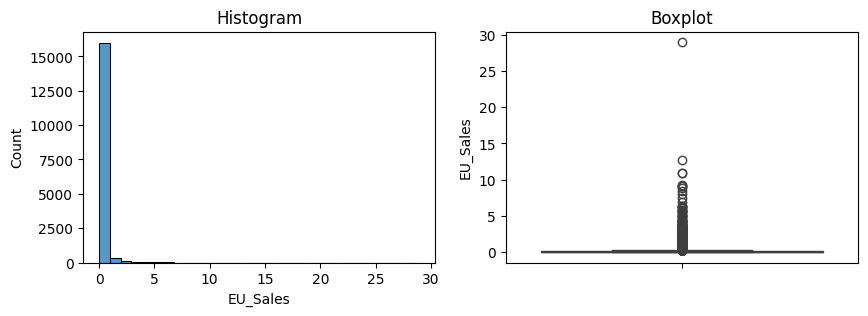

Skewness: 18.738452798697537
Kurtosis: 746.2404528724915


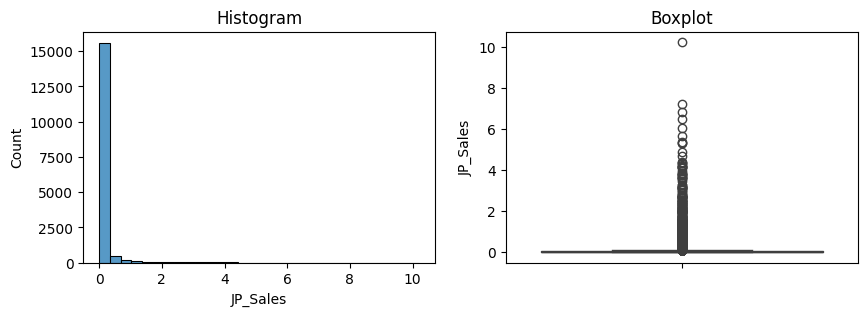

Skewness: 11.070250092790374
Kurtosis: 189.87166615170062


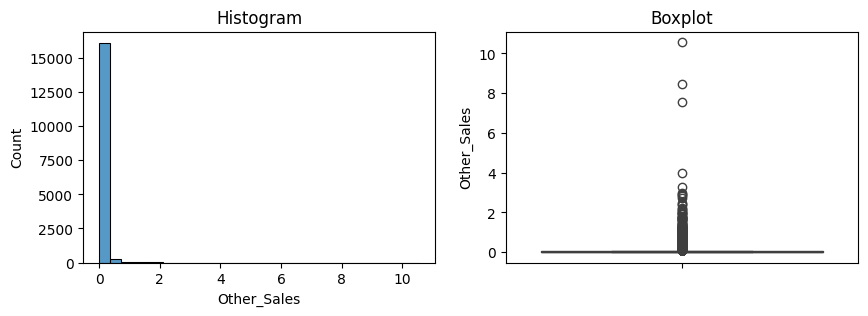

Skewness: 24.469223979053243
Kurtosis: 1043.9400116060492


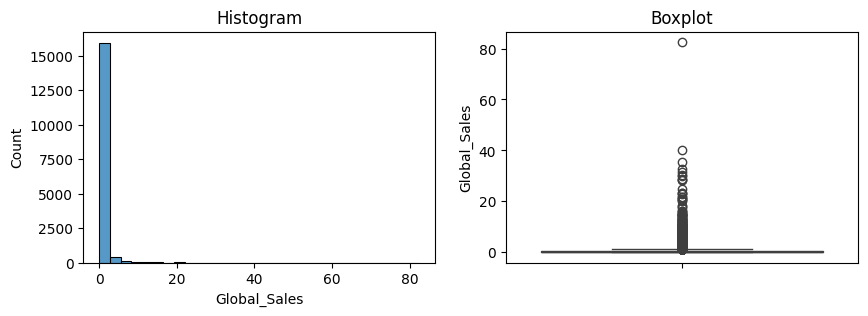

Skewness: 17.254903941484464
Kurtosis: 595.4579869766508


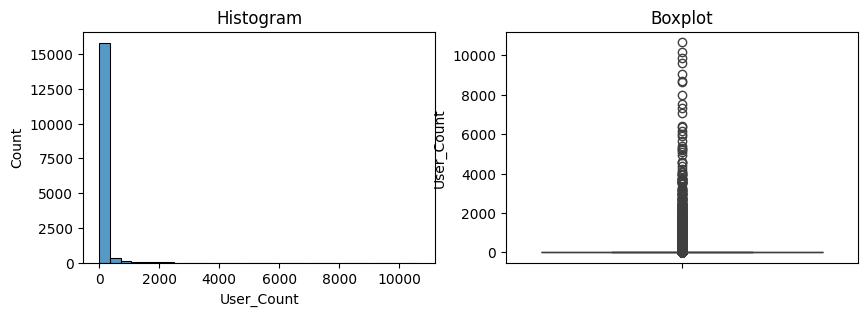

Skewness: 13.346730595878359
Kurtosis: 245.55094451197778


In [278]:
# Make a plot to check distribution
def check_distribution_outliers(df, columns):
    for i in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[i], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[i])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[i].skew())
        print('Kurtosis:', df[i].kurt())

check_distribution_outliers(df[numerical_columns], numerical_columns)

There are outliers in all numeric variables. However, we won't drop or modify them because these outliers represent **valid data points** and could have **significant meaning** in identifying characteristics customers. The outliers are **reasonable** and therefore don't require any adjustments.

C:\Users\Asus\AppData\Local\Temp\ipykernel_18252\1359904235.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


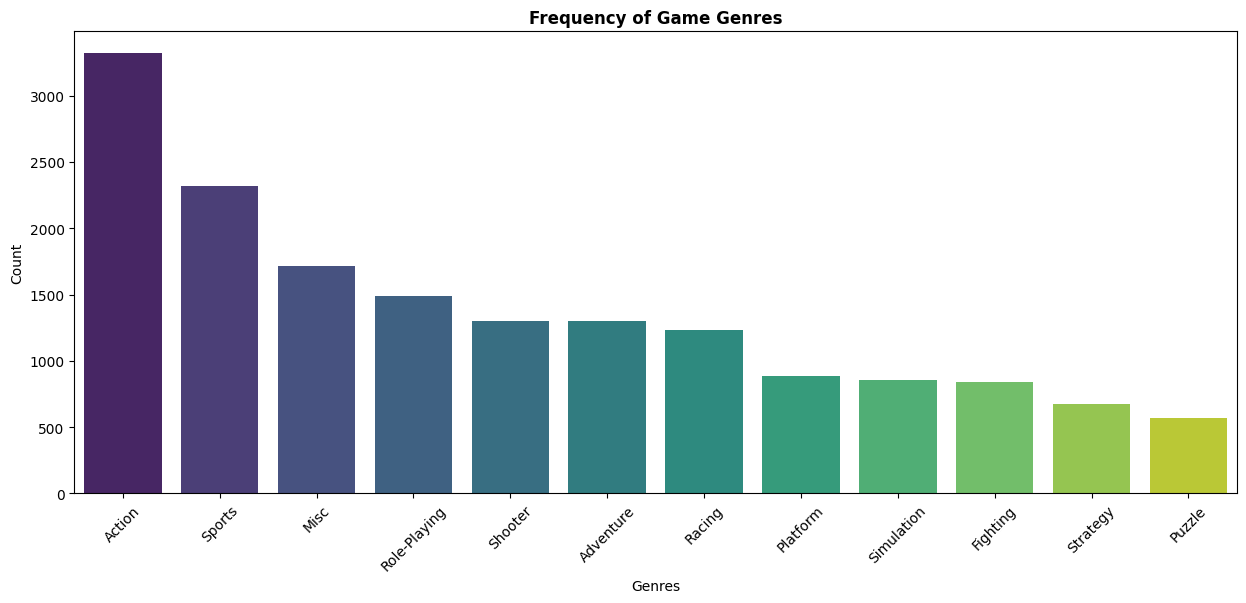

In [279]:
genres = df[df['Genre'].str.len() > 0]
genres = genres.explode('Genre')
genre_counts = genres['Genre'].value_counts()

plt.figure(figsize=(15, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Frequency of Game Genres', fontweight = "bold")
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Action** is the most popular genre, with the highest count, followed by **Sports and Miscellaneous (Misc)** games. **Role-Playing and Shooter** genres are moderately popular, while genres like **Strategy and Puzzle** have the lowest frequency. This indicates that action-packed and sports-related games dominate the market, whereas strategy and puzzle games cater to a smaller audience.

C:\Users\Asus\AppData\Local\Temp\ipykernel_18252\2984642295.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('Set2', len(top_publishers))


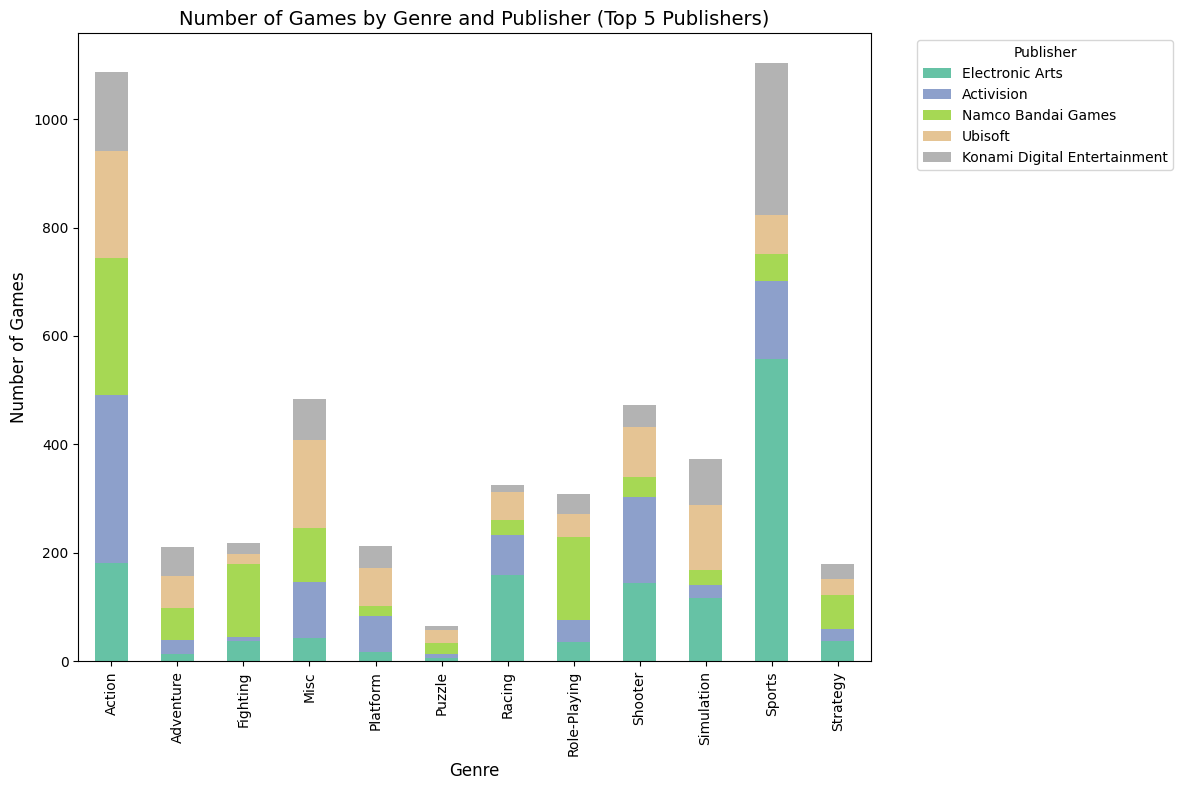

In [280]:
# Group data by Genre and Publisher
grouped_data = df.groupby(['Genre', 'Publisher']).size().unstack(fill_value=0)

# Select top 10 publishers based on total games
top_publishers = grouped_data.sum(axis=0).nlargest(5).index
filtered_data = grouped_data[top_publishers]

# Define a colormap
colors = cm.get_cmap('Set2', len(top_publishers)) 

# Plot bar chart with custom colors
filtered_data.plot(
    kind='bar',
    figsize=(12, 8),
    stacked=True,
    color=[colors(i) for i in range(len(top_publishers))]
)

plt.title('Number of Games by Genre and Publisher (Top 5 Publishers)', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.legend(title='Publisher', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Sports and Action** are the most popular genres, with **Electronic Arts** leading in **Sports** and **Ubisoft** and **Activision** dominating **Action**.

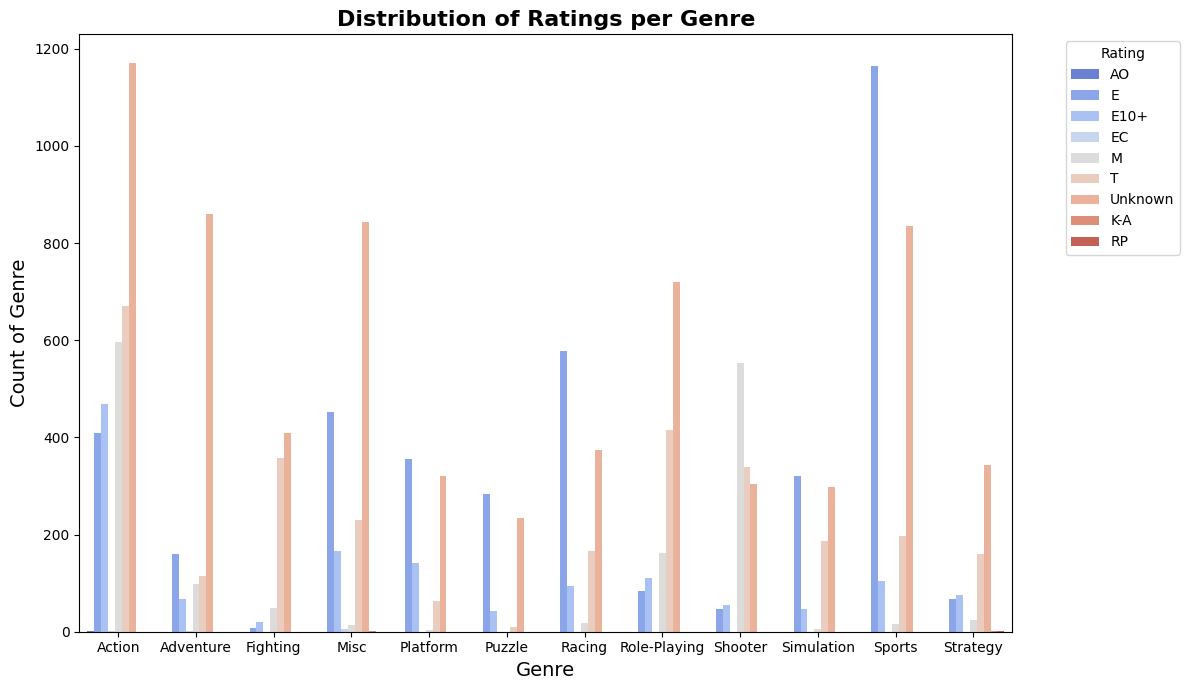

In [281]:
# Group data by Genre and Rating
grouped_data = df.groupby(['Genre', 'Rating']).size().reset_index(name='Count')

# Create a grouped bar chart
plt.figure(figsize=(12, 7))
sns.barplot(
    data=grouped_data,
    x='Genre',
    y='Count',
    hue='Rating',
    palette='coolwarm'
)

# Add titles and labels
plt.title('Distribution of Ratings per Genre', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count of Genre', fontsize=14)

# Move the legend
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

- Genres with family-friendly content, such as **Sports, Racing, and Simulation**, lean heavily toward E (Everyone) ratings.
- More mature ratings (T (Teen) and M (Mature)) are clustered in genres typically associated with older audiences, such as **Shooter and Action**.

C:\Users\Asus\AppData\Local\Temp\ipykernel_18252\2245122547.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_games, x='Name', y='Count', palette='magma')


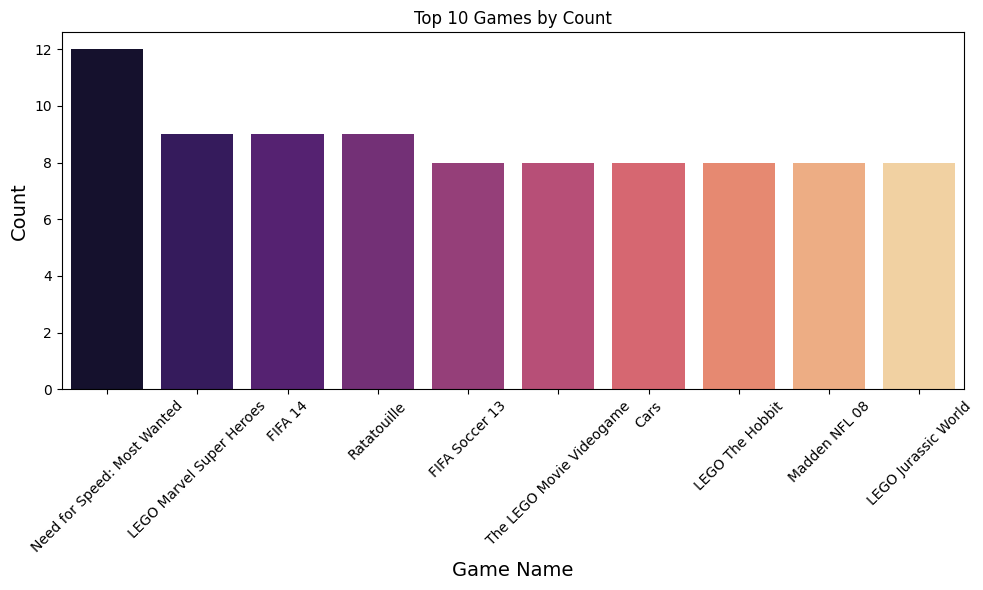

In [282]:
# Count occurrences of each game
game_counts = df['Name'].value_counts().reset_index()
game_counts.columns = ['Name', 'Count']

# Select top 5 games
top_10_games = game_counts.head(10)

# Plot the top 5 games
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_games, x='Name', y='Count', palette='magma')

# Add titles and labels
plt.title('Top 10 Games by Count')
plt.xlabel('Game Name', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

- **Need for Speed: Most Wanted** stands out as a clear leader in popularity.
- LEGO games are collectively very popular in this dataset, suggesting they appeal to a wide audience.
- Games in the FIFA series appear twice (**FIFA 14 and FIFA Soccer 13**), highlighting their consistent popularity.

# Recommendation System

## Content-Based Filtering

In [283]:
smd = df.copy()

In [284]:
smd['text'] = smd['Name'] + ', ' + smd['Platform'] + ', ' + smd['Genre'] + ', ' + smd['Publisher'] + ', ' + smd['Developer'] + ', ' + smd['Rating'] + ', ' + str(smd['Year_of_Release']) + str(smd['Global_Sales']) + str(smd['User_Count'])
smd.dropna(subset=['text'], inplace=True)
smd['text'] = smd['text'].str.lower()

In [285]:
x = smd.copy()
x = x.sample(10000)
x = x.drop_duplicates(subset=['text']).reset_index(drop=True)
x['text'].duplicated().sum()

0

## TF-IDF

In [286]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(x['text']).toarray()
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

## Build Recommender System

In [322]:
def get_recommendations(title, cosine_sim=cosine_sim, num_recommend = 5):
    indices = pd.Series(x.index, index=x['Name']).drop_duplicates()
    idx = indices[title].iloc[0] if isinstance(indices[title], pd.Series) else indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_similar = sim_scores[1:num_recommend+1]
    movie_indices = [i[0] for i in top_similar]
    ret_df = pd.DataFrame(x.iloc[movie_indices])
    ret_df['Score'] = [i[1] for i in top_similar]
    ret_df = ret_df.drop(columns = ['text'])
    return ret_df

In [309]:
x['Name'].head(20)

0                                         Project Spark
1                                 Record of Agarest War
2                               Attack of the Movies 3D
3                                    NCAA Football 2004
4                                 Donkey Kong Country 2
5                   Super Dodgeball Brawlers (jp sales)
6                  Friends: The One with All the Trivia
7                             Armored Core: Silent Line
8                                       Salon Superstar
9        Naruto Shippuden: Gekito Ninja Taisen! Special
10                                  MLB Power Pros 2008
11                                      Guardian Heroes
12                                Skylanders SWAP Force
13                                   Namco Museum Vol.3
14                    Detana TwinBee Yahho! Deluxe Pack
15                                Battlefield: Hardline
16                            Mario Kart: Super Circuit
17    Sengoku Hime 2 Arashi: Hyakubana Senran Ta

## Evaluation Recommender System

In [320]:
df[df['Name'] == 'Wand of Fortune'].iloc[:1]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating
16465,Wand of Fortune,PS2,2009,Adventure,Idea Factory,0.0,0.0,0.01,0.0,0.01,24.0,Unknown,Unknown


In [323]:
rec_games = get_recommendations('Wand of Fortune')
rec_games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating,Score
8787,Wand of Fortune R,PSV,2016,Adventure,Idea Factory,0.0,0.0,0.02,0.0,0.02,24.0,Unknown,Unknown,0.963633
8205,Wand of Fortune Portable,PSP,2010,Adventure,Idea Factory,0.0,0.0,0.01,0.0,0.01,24.0,Unknown,Unknown,0.934816
6640,S.Y.K Renshouden,PS2,2010,Adventure,Idea Factory,0.0,0.0,0.03,0.0,0.03,24.0,Unknown,Unknown,0.719680
8193,Are You Alice?,PSP,2011,Adventure,Idea Factory,0.0,0.0,0.02,0.0,0.02,24.0,Unknown,Unknown,0.714132
6166,Hakuouki DS,DS,2010,Adventure,Idea Factory,0.0,0.0,0.07,0.0,0.07,24.0,Unknown,Unknown,0.690025


When we call the function to get game recommendations based on 'Wand of Fortune', the function returns the top 5 recommended games with **similarity scores ranging from 69% to 96%**. This indicates that the recommended items are closely related to the input game. Furthermore, several recommended games share similarities with the input game in terms of **name, genre, publisher, user count, developer, and rating**. This demonstrates that the recommendation system effectively associates recommended items with the characteristics of the input, ensuring relevant and meaningful suggestions.

In [324]:
df[df['Name'] == 'Rogue Trooper'].iloc[:1]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating
13575,Rogue Trooper,PS2,2006,Shooter,Eidos Interactive,0.02,0.02,0.0,0.01,0.04,9.0,Rebellion,T


In [325]:
rec_games = get_recommendations('Rogue Trooper')
rec_games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating,Score
9967,Rogue Trooper,XB,2006,Shooter,Eidos Interactive,0.01,0.00,0.0,0.00,0.02,11.0,Rebellion,T,0.970057
6451,Rogue Trooper: Quartz Zone Massacre,Wii,2009,Shooter,Reef Entertainment,0.06,0.00,0.0,0.01,0.07,5.0,Rebellion,T,0.684002
4669,Rogue Warrior,PS3,2009,Shooter,Bethesda Softworks,0.11,0.01,0.0,0.01,0.13,66.0,Rebellion,M,0.683837
2322,Rogue Warrior,X360,2009,Shooter,Bethesda Softworks,0.09,0.01,0.0,0.01,0.11,64.0,Rebellion,M,0.683609
6825,ShellShock 2: Blood Trails,PS3,2009,Shooter,Eidos Interactive,0.04,0.03,0.0,0.01,0.08,27.0,Rebellion,M,0.627356


When we call the function to get game recommendations based on 'Rogue Trooper', the function returns the top 5 recommended games with **similarity scores ranging from 62% to 97%**. This indicates that the recommended items are closely related to the input game. Furthermore, several recommended games share similarities with the input game in terms of **name, genre, user count, and developer**. This demonstrates that the recommendation system effectively associates recommended items with the characteristics of the input, ensuring relevant and meaningful suggestions.

In [326]:
df[df['Name'] == 'Donkey Kong Country 2'].iloc[:1]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating
1629,Donkey Kong Country 2,GBA,2004,Platform,Nintendo,0.79,0.27,0.12,0.04,1.23,37.0,Rare Ltd.,E


In [ ]:
rec_games = get_recommendations('Donkey Kong Country 2')
rec_games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating,Score
5178,Donkey Kong Country,GBA,2003,Platform,Nintendo,1.20,0.48,0.29,0.07,2.04,53.0,Rare Ltd.,E,1.000000
9398,Donkey Kong Country,SNES,1994,Platform,Nintendo,4.36,1.71,3.00,0.23,9.30,24.0,Unknown,Unknown,0.858109
9850,Donkey Kong Country Returns,3DS,2013,Platform,Nintendo,0.74,0.62,0.41,0.13,1.89,24.0,Unknown,Unknown,0.808047
9751,Donkey Kong Country Returns,Wii,2010,Platform,Nintendo,3.17,1.79,1.03,0.46,6.44,368.0,Retro Studios,E,0.761989
721,Donkey Kong Country 2: Diddy's Kong Quest,SNES,1995,Platform,Nintendo,2.10,0.74,2.20,0.11,5.15,24.0,Unknown,Unknown,0.761002


When we call the function to get game recommendations based on 'Donkey Kong Country 2', the function returns the top 5 recommended games with **similarity scores ranging from 100% to 76%**. This indicates that the recommended items are closely related to the input game. Furthermore, several recommended games share similarities with the input game in terms of **name, genre, and publisher**. This demonstrates that the recommendation system effectively associates recommended items with the characteristics of the input, ensuring relevant and meaningful suggestions.

### Summary of Findings

Based on the three analyses, it can be concluded that our recommender system is **highly effective** at associating recommendations with the input provided. The system consistently delivers results that align with the input's characteristics, such as genre, name, publisher, developer, user count, and rating. This indicates that the recommendations are **not only relevant but also meaningful**, demonstrating the system's ability to provide accurate and well-targeted suggestions.